# Project: Machine Learning

**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
   
2. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive if you haven't already. This will be the repository for all your completed assignment and project files, aiding you in keeping your work organized and accessible.
   
3. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
4. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
   
5. **Setting Permission toPublic**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.

## Student Identity

In [1]:
# @title #### Student Identity
student_id = "READ59HZ" # @param {type:"string"}
name = "Salwa Ziada Salsabiila" # @param {type:"string"}
drive_link = "https://drive.google.com/drive/folders/1CznSO8Izm7LBy_CkzJfmQCYq_rovFUtz?usp=sharing"  # @param {type:"string"}
# Model yang digunakan adalah model KNN
assignment_id = "00_ml_project"

# Import grader package
!pip install rggrader
from rggrader import submit, submit_image

## Project Description

In this Machine Learning Project, you will create your own supervised Machine Learning (ML) model. We will use the full FIFA21 Dataset and we will identify players that are above average.

We will use the column "Overall" with a treshold of 75 to define players that are 'Valuable'. This will become our target output which we need for a supervised ML model. Because we use the "Overall" as our target output, you cannot use "Overall" in your features, this will be explained further below.

This project will provide a comprehensive overview of your abilities in machine learning, from understanding the problem, choosing the right model, training, and optimizing it.

## Grading Criteria

Your score will be awarded based on the following criteria:
* 100: The model has an accuracy of more than 80% and an F1 score of more than 85%. This model is excellent and demonstrates a strong understanding of the task.
* 90: The model has an accuracy of more than 75% and an F1 score of more than 80%. This model is very good, with some room for improvement.
* 80: The model has an accuracy of more than 70% and an F1 score between 70% and 80%. This model is fairly good but needs improvement in balancing precision and recall.
* 70: The model has an accuracy of more than 65% and an F1 score between 60% and 70%. This model is below average and needs significant improvement.
* 60 or below: The model has an accuracy of less than 65% or an F1 score of less than 60%, or the student did not submit the accuracy and F1 score. This model is poor and needs considerable improvement.

Rmember to make a copy of this notebook in your Google Drive and work in your own copy.

Happy modeling!

>Note: If you get the accuracy of 100% and F1 score of 100%, while it may earn you good grades, it's an indication of overfitting.

In [35]:
# Write any package/module installation that you need
# pip install goes here, this helps declutter your output below
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #Percobaan ke-1
from sklearn.neighbors import KNeighborsClassifier #Percobaan ke-2 # Model yang digunakan adalah model KNN
from sklearn.linear_model import LogisticRegression #Percobaan ke-3
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

## Load the dataset and clean it

In this task, you will prepare and load your dataset. You need to download the full FIFA 21 Dataset from the link here: [Kaggle FIFA Player Stats Database](https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?resource=download&select=FIFA21_official_data.csv).

>Note: Make sure you download FIFA 21 dataset.
>
>![FIFA21 Dataset](https://storage.googleapis.com/rg-ai-bootcamp/projects/fifa21_dataset-min.png)

After you download the dataset, you will then import the dataset then you will clean the data. For example there may be some empty cell in the dataset which you need to fill. Maybe there are also data that you need to convert to numeric value for analysis. Identify the data that is incomplete and fix them.

In the code block below, you can use the comments to guide you on what to do.

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Write your preprocessing and data cleaning hereT

# Load your data
df = pd.read_csv('/content/drive/MyDrive/AI Bootcamp Projects/Project 2 Salwa Ziada Salsabiila/FIFA21_official_data.csv')

# Check your data for empty cell
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Club                      325
Body Type                  25
Real Face                  25
Position                   20
Jersey Number              20
Joined                   1449
Loaned From             16186
Contract Valid Until      496
Volleys                    39
Curve                      39
Agility                    39
Balance                    39
Jumping                    39
Interceptions               3
Positioning                 3
Vision                     39
Composure                 287
Marking                 16166
SlidingTackle              39
Release Clause           1629
DefensiveAwareness        942
dtype: int64


In [45]:
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17103,247866,19 C. Miszta,16,https://cdn.sofifa.com/players/247/866/19_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,50,70,Legia Warszawa,https://cdn.sofifa.com/teams/1871/light_30.png,...,13.0,48.0,51.0,56.0,40.0,56.0,GK,49.0,€120K,NaN
17104,251433,B. Voll,19,https://cdn.sofifa.com/players/251/433/20_60.png,Germany,https://cdn.sofifa.com/flags/de.png,51,63,FC Hansa Rostock,https://cdn.sofifa.com/teams/27/light_30.png,...,10.0,52.0,55.0,52.0,42.0,57.0,GK,51.0,€83K,5.0
17105,252420,T. Parker,18,https://cdn.sofifa.com/players/252/420/20_60.png,Northern Ireland,https://cdn.sofifa.com/flags/gb-nir.png,51,70,Luton Town,https://cdn.sofifa.com/teams/1923/light_30.png,...,11.0,50.0,49.0,50.0,53.0,55.0,GK,51.0,€149K,8.0
17106,248182,H. Sveijer,18,https://cdn.sofifa.com/players/248/182/20_60.png,Sweden,https://cdn.sofifa.com/flags/se.png,49,63,IK Sirius,https://cdn.sofifa.com/teams/113458/light_30.png,...,10.0,50.0,51.0,49.0,50.0,51.0,GK,49.0,€94K,8.0


In [46]:
column = ['Release Clause']
# Replace character €, K menjadi 000, M menjadi 000000T
df[column] = df[column].replace(['€'],'', regex=True)
df[column] = df[column].replace(['K'],'000', regex=True)
df[column] = df[column].replace(['M'],'000000', regex=True)

In [47]:
df['Release Clause']

0         64.6000000
1          161000000
2        124.4000000
3        103.5000000
4         46.2000000
            ...     
17103         120000
17104          83000
17105         149000
17106          94000
17107         109000
Name: Release Clause, Length: 17108, dtype: object

In [48]:
df['Release Clause'].dtypes
# Mengubah menjadi int
df[column] = df[column].astype(float)
# Replace NaN values with a specific value (e.g., -1) before casting to int
df[column] = df[column].fillna(-1).astype(int)
df['Release Clause']

0               64
1        161000000
2              124
3              103
4               46
           ...    
17103       120000
17104        83000
17105       149000
17106        94000
17107       109000
Name: Release Clause, Length: 17108, dtype: int64

In [49]:
# Cek apakah ada nilai yang hilang dalam kolom 'release_clause'
missing_values = df['Release Clause'].isnull().sum()

# Tampilkan hasil
print(f"Jumlah nilai yang hilang dalam kolom 'release_clause': {missing_values}")


Jumlah nilai yang hilang dalam kolom 'release_clause': 0


In [50]:
# Konversi kolom 'Joined' ke tipe data datetime
df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce')

# Menghitung tanggal rata-rata (ignorando nilai yang hilang)
average_join_date = df['Joined'].mean()

# Mengisi nilai yang hilang dengan tanggal rata-rata
df['Joined'].fillna(average_join_date, inplace=True)

In [51]:
df.dtypes

ID                       int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
                        ...   
GKReflexes             float64
Best Position           object
Best Overall Rating    float64
Release Clause           int64
DefensiveAwareness     float64
Length: 65, dtype: object

In [52]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [53]:
df = df.drop(columns=['Loaned From','Marking'])

In [54]:
# Check your data for empty cell
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Club                    325
Body Type                25
Real Face                25
Position                 20
Jersey Number            20
Contract Valid Until    496
Volleys                  39
Curve                    39
Agility                  39
Balance                  39
Jumping                  39
Interceptions             3
Positioning               3
Vision                   39
Composure               287
SlidingTackle            39
DefensiveAwareness      942
dtype: int64


In [55]:
# Menampilkan nama kolom dan tipe data
for column in df.columns:
    print(f"Kolom: {column}, Tipe Data: {df[column].dtype}")


Kolom: ID, Tipe Data: int64
Kolom: Name, Tipe Data: object
Kolom: Age, Tipe Data: int64
Kolom: Photo, Tipe Data: object
Kolom: Nationality, Tipe Data: object
Kolom: Flag, Tipe Data: object
Kolom: Overall, Tipe Data: int64
Kolom: Potential, Tipe Data: int64
Kolom: Club, Tipe Data: object
Kolom: Club Logo, Tipe Data: object
Kolom: Value, Tipe Data: object
Kolom: Wage, Tipe Data: object
Kolom: Special, Tipe Data: int64
Kolom: Preferred Foot, Tipe Data: object
Kolom: International Reputation, Tipe Data: float64
Kolom: Weak Foot, Tipe Data: float64
Kolom: Skill Moves, Tipe Data: float64
Kolom: Work Rate, Tipe Data: object
Kolom: Body Type, Tipe Data: object
Kolom: Real Face, Tipe Data: object
Kolom: Position, Tipe Data: object
Kolom: Jersey Number, Tipe Data: float64
Kolom: Joined, Tipe Data: datetime64[ns]
Kolom: Contract Valid Until, Tipe Data: object
Kolom: Height, Tipe Data: object
Kolom: Weight, Tipe Data: object
Kolom: Crossing, Tipe Data: float64
Kolom: Finishing, Tipe Data: float64


In [57]:
# Mengisi missing value
df = df.fillna({
'Jersey Number' : df['Jersey Number'].mean(),
'Volleys' : df['Volleys'].mean(),
'Curve' : df['Curve'].mean(),
'Agility' : df['Agility'].mean(),
'Balance' : df['Balance'].mean(),
'Jumping' : df['Jumping'].mean(),
'Interceptions' : df['Interceptions'].mean(),
'Positioning' : df['Positioning'].mean(),
'Vision' : df['Vision'].mean(),
'Composure' : df['Composure'].mean(),
'SlidingTackle' : df['SlidingTackle'].mean(),
'DefensiveAwareness' : df['DefensiveAwareness'].mean(),
'Club' : 'unknown',
'Body Type' : 'unknown',
'Real Face' : 'unknown',
'Position' : 'unknown',
'Contract Valid Until' : 'unknown'
})

df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,64,57.000000
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,161000000,68.000000
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,124,72.000000
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,103,59.000000
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,46,79.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17103,247866,19 C. Miszta,16,https://cdn.sofifa.com/players/247/866/19_60.png,Poland,https://cdn.sofifa.com/flags/pl.png,50,70,Legia Warszawa,https://cdn.sofifa.com/teams/1871/light_30.png,...,13.0,48.0,51.0,56.0,40.0,56.0,GK,49.0,120000,47.014475
17104,251433,B. Voll,19,https://cdn.sofifa.com/players/251/433/20_60.png,Germany,https://cdn.sofifa.com/flags/de.png,51,63,FC Hansa Rostock,https://cdn.sofifa.com/teams/27/light_30.png,...,10.0,52.0,55.0,52.0,42.0,57.0,GK,51.0,83000,5.000000
17105,252420,T. Parker,18,https://cdn.sofifa.com/players/252/420/20_60.png,Northern Ireland,https://cdn.sofifa.com/flags/gb-nir.png,51,70,Luton Town,https://cdn.sofifa.com/teams/1923/light_30.png,...,11.0,50.0,49.0,50.0,53.0,55.0,GK,51.0,149000,8.000000
17106,248182,H. Sveijer,18,https://cdn.sofifa.com/players/248/182/20_60.png,Sweden,https://cdn.sofifa.com/flags/se.png,49,63,IK Sirius,https://cdn.sofifa.com/teams/113458/light_30.png,...,10.0,50.0,51.0,49.0,50.0,51.0,GK,49.0,94000,8.000000


In [58]:
# Mengecek missing value
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [59]:
df.shape

(17108, 63)

## Build and Train your model

In this task you will analyze the data and select the features that is best at predicting if the Player is a 'Valuable' player or not.

The first step is to **define the target output** that you will use for training. Here's an example of how to create a target output:
- `df['OK Player'] = df['Overall'].apply(lambda x: 1 if x >= 50 else 0) #Define the OK Player using treshold of 50.`

Next you will **identify the features** that will best predict a 'Valuable' player. You are required to **submit the features you selected** in the Submission section below. Because we use the "Overall" as our target output, the use of "Overall" in your features is not allowed. You will automatically get 0 if you submit "Overall" in your features.

Once you identify the features, you will then **split the data** into Training set and Testing/Validation set.

Depending on the features you selected, **you may need to scale the features**.

Now you will **train your model, choose the algorithm** you are going to use carefully to make sure it gives the best result.

Once you have trained your model, you need to test the model effectiveness. **Make predictions against your Testing/Validation set** and evaluate your model. You are required to **submit the Accuracy Score and F1 score** in the Submission section below.

In the code block below, you can use the comments to guide you on what to do.

We have also provided 3 variables that you must use in your code, `ml_features`, `ml_accuracy` and `ml_f1_score`. You can move the variables around your code, assign values to them, but you cannot delete them.

Age: Umur pemain.

Nationality: Kebangsaan pemain.

International Reputation: Reputasi
internasional pemain.

Preferred Foot: Kaki yang lebih sering digunakan pemain.

Skill Moves: Tingkat keahlian pemain dalam melakukan gerakan.

Work Rate: Tingkat kerja pemain.

Position: Posisi permainan pemain.

Height: Tinggi pemain.

Weight: Berat pemain.

Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys: Kemampuan teknis pemain dalam hal crossing, finishing, heading, passing, dan volleys.

In [60]:
# Define the target output
df['Valuable Player'] = df['Overall'].apply(lambda x: 1 if x >= 75 else 0)


In [61]:
# Identify the features excluding 'Overall'
ml_features = ['Age', 'International Reputation',
               'Skill Moves', 'Height', 'Weight',
               'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys']


In [62]:
df[['Age', 'International Reputation','Skill Moves', 'Height', 'Weight','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys']]

,Age,International Reputation,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys
0,33,5.0,3.0,6'0,190lbs,80.0,92.0,84.0,83.0,90.0
1,29,4.0,4.0,5'11,154lbs,94.0,82.0,55.0,94.0,82.0
2,25,2.0,4.0,5'10,152lbs,87.0,77.0,58.0,88.0,86.0
3,29,4.0,4.0,5'9,161lbs,83.0,88.0,83.0,84.0,87.0
4,28,2.0,4.0,5'8,152lbs,87.0,66.0,57.0,81.0,68.0
...,...,...,...,...,...,...,...,...,...,...
17103,16,1.0,1.0,6'4,176lbs,14.0,5.0,13.0,24.0,5.0
17104,19,1.0,1.0,6'5,187lbs,8.0,9.0,11.0,23.0,7.0
17105,18,1.0,1.0,6'3,176lbs,10.0,7.0,10.0,17.0,8.0
17106,18,1.0,1.0,6'1,168lbs,10.0,7.0,11.0,19.0,7.0


In [63]:
def feet_to_cm(height):
    # Split the height into feet and inches
    feet, inches = map(int, height.split("'"))

    # Convert feet and inches to centimeters
    cm_height = feet * 30.48 + inches * 2.54

    return cm_height

df['Height'] = df['Height'].apply(feet_to_cm)

In [64]:
# Replace character €, K menjadi 000, M menjadi 000000T
df['Weight'] = df['Weight'].replace(['lbs'],'', regex=True)

In [65]:
df[['Age', 'International Reputation','Skill Moves', 'Height', 'Weight','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys']]

,Age,International Reputation,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys
0,33,5.0,3.0,182.88,190,80.0,92.0,84.0,83.0,90.0
1,29,4.0,4.0,180.34,154,94.0,82.0,55.0,94.0,82.0
2,25,2.0,4.0,177.80,152,87.0,77.0,58.0,88.0,86.0
3,29,4.0,4.0,175.26,161,83.0,88.0,83.0,84.0,87.0
4,28,2.0,4.0,172.72,152,87.0,66.0,57.0,81.0,68.0
...,...,...,...,...,...,...,...,...,...,...
17103,16,1.0,1.0,193.04,176,14.0,5.0,13.0,24.0,5.0
17104,19,1.0,1.0,195.58,187,8.0,9.0,11.0,23.0,7.0
17105,18,1.0,1.0,190.50,176,10.0,7.0,10.0,17.0,8.0
17106,18,1.0,1.0,185.42,168,10.0,7.0,11.0,19.0,7.0


In [66]:
df['Weight']

0        190
1        154
2        152
3        161
4        152
        ... 
17103    176
17104    187
17105    176
17106    168
17107    172
Name: Weight, Length: 17108, dtype: object

In [67]:
# Split the data into training set and test set
X = df[ml_features]
y = df['Valuable Player']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (13686, 10) (13686,)
Test set: (3422, 10) (3422,)


In [68]:
df.dtypes

ID                       int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
                        ...   
Best Position           object
Best Overall Rating    float64
Release Clause           int64
DefensiveAwareness     float64
Valuable Player          int64
Length: 64, dtype: object

In [69]:
float_columns = df.select_dtypes(include='float').columns
df[float_columns] = df[float_columns].astype(int)

In [70]:
df.dtypes

ID                      int64
Name                   object
Age                     int64
Photo                  object
Nationality            object
                        ...  
Best Position          object
Best Overall Rating     int64
Release Clause          int64
DefensiveAwareness      int64
Valuable Player         int64
Length: 64, dtype: object

# DECISION TREE

Accuracy: 0.9143775569842197

F1 Score: 0.6448484848484849

In [153]:
# Train the model (using logistic regression as specified)

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [154]:
# Assuming you have already trained the decision tree model and split the data (X_test, y_test) previously

# Make predictions using the test set
y_pred = model.predict(X_test)

# Calculate accuracy
ml_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", ml_accuracy)

# Calculate F1 Score
ml_f1_score = f1_score(y_test, y_pred)
print("F1 Score:", ml_f1_score)


Accuracy: 0.9143775569842197
F1 Score: 0.6448484848484849


# KNN

In [72]:
# Train Model and Predict
k = 11
classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean').fit(X_train,y_train)
classifier

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [73]:
# Predict the test set result
y_hat = classifier.predict(X_test)
y_hat

array([0, 0, 0, ..., 1, 0, 0])

In [81]:
# Evaluate Model
cm = confusion_matrix(y_test, y_hat)
print (cm)
ml_accuracy = accuracy_score(y_test, y_hat)
ml_f1_score = f1_score(y_test, y_hat)
print("F1 Score = ",ml_f1_score)
print("Accuracy Score = ", ml_accuracy)

[[2892   49]
 [ 201  280]]
F1 Score =  0.6913580246913581
Accuracy Score =  0.9269433080070134


In [78]:
# Trying to Find the best K
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict
    classifier = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=classifier.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.90181181, 0.90911748, 0.92109877, 0.9170076 , 0.91846873,
       0.9170076 , 0.91992987, 0.92285213, 0.92489772, 0.92226768,
       0.92694331, 0.92314436, 0.92460549, 0.92197545, 0.92431327,
       0.92168323, 0.92343659, 0.92372881, 0.92372881])

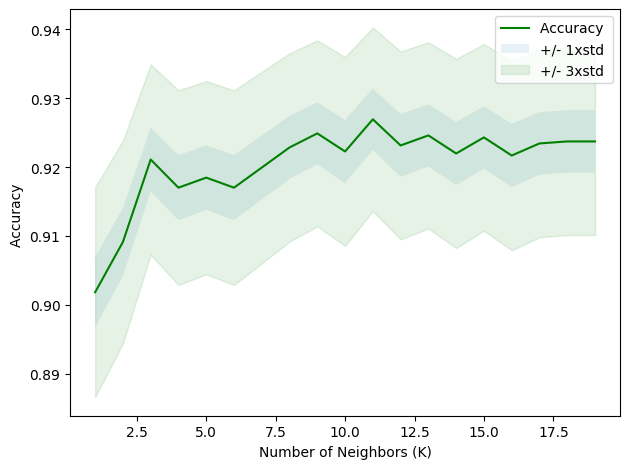

In [79]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [80]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.9269433080070134 with k= 11


# Logistic Regression

In [171]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions using the test set
y_pred = model.predict(X_test)

# Calculate accuracy
ml_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", ml_accuracy)

# Calculate F1 Score
ml_f1_score = f1_score(y_test, y_pred)
print("F1 Score:", ml_f1_score)

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.8945061367621274
F1 Score: 0.5075034106412006
Confusion Matrix:
 [[2875   66]
 [ 295  186]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      2941
           1       0.74      0.39      0.51       481

    accuracy                           0.89      3422
   macro avg       0.82      0.68      0.72      3422
weighted avg       0.88      0.89      0.88      3422



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Submission

Once you are satisfied with the performance of your model, then you run the code block below to submit your project.


In [82]:
# Submit Method
# Model yang digunakan adalah model KNN
# Do not change the code below
question_id = "01_ml_project_features"
submit(student_id, name, assignment_id, str(ml_features), question_id, drive_link)
question_id = "02_ml_project_accuracy"
submit(student_id, name, assignment_id, str(ml_accuracy), question_id, drive_link)
question_id = "03_ml_project_f1score"
submit(student_id, name, assignment_id, str(ml_f1_score), question_id, drive_link)

'Assignment successfully submitted'

## FIN